In [166]:
##Assignment 2.1
#1
"""
function to generate Vandermonde matrix
Steps:
1)Iterate the input array
2)for each item in array generate the list
3)append the generated list to matrix
4)return the matrix
"""
def generate_list(num, len):
    """
    This function generates each of the row of matrix
    :param num:
    :param len:
    :return: list
    """
    my_list = [1, num]
    i = 1
    temp_int = num
    while (i < len):
        temp_int = num * temp_int
        my_list.append(temp_int)
        i += 1
    return my_list


def generate_matrix(array, row_length, incresing=False):
    """
    function to generate Vandermonde matrix
    :param array:
    :param row_length:
    :param incresing:
    :return: list
    """
    my_list = list()
    for item in array:
        temp_list = generate_list(item, n - 1)
        if incresing==False:
            temp_list = temp_list[::-1]
        my_list.append(temp_list)
    return my_list

arr = [4, 3, 5, 6]
n = 6
display(generate_matrix(arr, n, True))
display(generate_matrix(arr, n, False))

[[1, 4, 16, 64, 256, 1024],
 [1, 3, 9, 27, 81, 243],
 [1, 5, 25, 125, 625, 3125],
 [1, 6, 36, 216, 1296, 7776]]

[[1024, 256, 64, 16, 4, 1],
 [243, 81, 27, 9, 3, 1],
 [3125, 625, 125, 25, 5, 1],
 [7776, 1296, 216, 36, 6, 1]]

In [168]:
#2
import numpy as np
from IPython.display import display

def moving_avg(arr, k):
    assert arr.ndim == 1, "arr should be 1-D array"
    temp_list = []
    for i in range(0,arr.size-k+1):
        temp_list.append(np.array(np.sum(arr[i:i+k])/k))
    return np.array(temp_list)

l = [3, 5, 7, 2, 8, 10, 11, 65, 72, 81, 99, 100, 150]
arr = np.array(l)

moving_avg(np.array(l),3)

array([  5.        ,   4.66666667,   5.66666667,   6.66666667,
         9.66666667,  28.66666667,  49.33333333,  72.66666667,
        84.        ,  93.33333333, 116.33333333])

In [111]:
#2.2 
#Problem statement 1
#1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 10000)
import pandas as pd
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})

def distance_to_zero(df):
    df['Y']=''
    start = True
    counter=-1
    for index, row in df.iterrows():
        df.loc[:,'Y'].iloc[index]=index+1
        if(row.iloc[0]==0):
            start = False
            counter=0
            df.loc[:,'Y'].iloc[index]=0
        elif(start is False):
            counter+=1
            df.loc[:,'Y'].iloc[index]=counter
    return df
        
        
print(distance_to_zero(df))

   X  Y
0  7  1
1  2  2
2  0  0
3  3  1
4  4  2
5  2  3
6  5  4
7  0  0
8  3  1
9  4  2


In [4]:
#2
import pandas as pd
import numpy as np

b_days = pd.bdate_range(start='01-01-2015',end='31-12-2015')
random_nos = np.random.randint(1,1000,len(b_days))

s = pd.Series(index=b_days, data=random_nos)
display(s.head(4))

2015-01-01     99
2015-01-02    766
2015-01-05    279
2015-01-06    749
Freq: B, dtype: int64

In [5]:
#3
s.loc[s.index.day_name()=='Wednesday'].sum()

23747

In [6]:
#4
s.groupby(s.index.month).mean()

1     475.272727
2     572.100000
3     468.500000
4     495.318182
5     481.761905
6     557.727273
7     422.652174
8     521.142857
9     470.409091
10    484.636364
11    496.761905
12    559.652174
dtype: float64

In [8]:
#5
def compute_frquency(x):
    if(x.month)<5:
        return 1
    elif(x.month>8):
        return 3
    else:
        return 2
display(s.groupby(compute_frquency).agg(['max','idxmax']))

,max,idxmax
1,982,2015-02-03
2,957,2015-06-17
3,997,2015-09-22


In [113]:
#2.2
#Problem statement 2
#1)
import pandas as pd
df = pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv')
df = df.filter(regex='^[^Unnamed:].*', axis=1)

In [114]:
#2
df.groupby(['Gender']).describe()

Id                                                              \
           count          mean           std      min         25%        50%   
Gender                                                                         
F       558846.0  2.793178e+06  1.658818e+06  11350.0  1242540.25  2807898.5   
M       457549.0  2.877176e+06  1.643518e+06  24077.0  1325498.00  2867541.0   

                                   Year                                 \
               75%        max     count         mean       std     min   
Gender                                                                   
F       4333051.75  5634124.0  558846.0  2009.026258  3.137428  2004.0   
M       4241792.00  5647426.0  457549.0  2009.086085  3.139039  2004.0   

                                           Count                              \
           25%     50%     75%     max     count       mean         std  min   
Gender                                                                         
F       2006.0  2009.0  2012.0  2014.0  558846.0  29.310925   75.962992  5.0   
M       2006.0  2009.0  2012.0  2014.0  457549.0  41.615650  118.074308  5.0   

                                 
        25%   50%   75%     max  
Gender                           
F       6.0  10.0  23.0  3634.0  
M       7.0  12.0  29.0  4167.0

In [115]:
#3
df.Name.value_counts().head(5)

Riley     1112
Avery     1080
Jordan    1073
Peyton    1064
Hayden    1049
Name: Name, dtype: int64

In [116]:
#4
df['Name'].values[(df['Name'].size)//2]

'Kasey'

In [121]:
#5
df.groupby(['State', 'Gender']).count()[['Count']]

Count
State Gender       
AK    F        2404
      M        2587
AL    F        9878
      M        8419
AR    F        7171
      M        6475
AZ    F       14518
      M       10820
CA    F       45144
      M       31637
CO    F       11424
      M        9183
CT    F        6575
      M        5733
DC    F        3053
      M        3000
DE    F        2549
      M        2440
FL    F       25781
      M       20070
GA    F       19385
      M       15454
HI    F        3255
      M        3546
IA    F        7131
      M        6307
ID    F        4918
      M        4833
IL    F       21268
      M       16828
IN    F       13056
      M       10613
KS    F        7753
      M        6748
KY    F        8817
      M        7267
LA    F       10510
      M        9676
MA    F       10580
      M        8609
MD    F       11276
      M        9483
ME    F        2976
      M        2777
MI    F       16038
      M       13243
MN    F       10677
      M        9004
MO    F       11948
      M        9917
MS    F        7235
      M        6862
MT    F        2690
      M        2986
NC    F       17357
      M       13530
ND    F        2399
      M        2581
NE    F        5370
      M        5029
NH    F        2957
      M        2659
NJ    F       15041
      M       12274
NM    F        5721
      M        4966
NV    F        7092
      M        6024
NY    F       28158
      M       22585
OH    F       18143
      M       14318
OK    F        9519
      M        8138
OR    F        8604
      M        7333
PA    F       17480
      M       14171
RI    F        2558
      M        2468
SC    F        9465
      M        8195
SD    F        2838
      M        2908
TN    F       13063
      M       10588
TX    F       39760
      M       27791
UT    F        9515
      M        8233
VA    F       14759
      M       11997
VT    F        1398
      M        1618
WA    F       13329
      M       11049
WI    F       10549
      M        8940
WV    F        4305
      M        3733
WY    F        1456
      M        1904

In [122]:
#2.3
#1
##1
import sys

def iterate_list(l):
    for entry in randomList:
        try:
            print("The entry is", entry)
            r = 1/int(entry)
            break
        except:
            print("Oops!",sys.exc_info()[0],"occured.")
            print("Next entry.")
            print()
    print("The reciprocal of",entry,"is",r)
randomList = ['a', 0, 2]
iterate_list(randomList)

The entry is a
Oops! <class 'ValueError'> occured.
Next entry.

The entry is 0
Oops! <class 'ZeroDivisionError'> occured.
Next entry.

The entry is 2
The reciprocal of 2 is 0.5


In [131]:
##2
#Write a Python program to give exception “Array Out of Bound” if the user wants to access the 
#elements beyond the list size (use try and except)

int_list = [1,2,3,4]
#int_list[5]
try:
    int_list[4]
except IndexError:
    raise IndexError('Array out of Bound')

IndexError: Array out of Bound

In [138]:
##3
#We can save this file as fibo.py
def feb2(till):
    i = 0
    j = 1
    next = 1
    print(i)
    print(j)
    while(next<=till):
        print(next)
        i = j
        j = next
        next = i+j
feb2(1000)

0
1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987


In [146]:
##4
#we can save this file as palindrome.py
def ispalindrome(st):
    if(st[::-1]==st):
        return True
    else:
        return False
display(ispalindrome('heh'))
display(ispalindrome('hhho'))

True

False

In [6]:
##5
import random
from Crypto.Cipher import XOR
import base64

class Cipher:
    key = str(random.randint(1,51))
    
    def __init__(self):
        self.input = input('Please enter a string :')
        self.spl_chars = ''.join(c for c in self.input if not c.isalnum())
        self.alnum = ''.join(c for c in self.input if c.isalnum())
        self.cipher = XOR.new(self.key)
        
    def encrypt(self):
        self.encoded_text = base64.b64encode(self.cipher.encrypt(self.alnum))
        print('Encrypted text is :'+(self.encoded_text.decode('utf-8')))
        
    def decrypt(self):
        decoded_text = self.cipher.decrypt(base64.b64decode(self.encoded_text))
        print('Decrypted text is :'+(decoded_text.decode('utf-8'))+self.spl_chars)

In [7]:
s = Cipher()
s.encrypt()
s.decrypt()

Please enter a string : Hell@@


Encrypted text is :cF1UVA==
Decrypted text is :Hell@@


In [25]:
##6
#1
import pandas as pd

tags = pd.read_csv('/Users/naresh/files/DataScience/Acadgild/S7_Pandas/ml-20m/tags.csv')
tags.head(1)

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180


In [26]:
#2
print(type(tags.head(1)))

<class 'pandas.core.frame.DataFrame'>


In [27]:
#3
display(tags.iloc[[0,11,2000],:])

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
11,65,1783,noir thriller,1368149983
2000,910,68554,conspiracy theory,1368043943


In [29]:
#4
display(tags.index)
display(tags.columns)

RangeIndex(start=0, stop=465564, step=1)

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

In [151]:
#5
ratings = pd.read_csv('/Users/naresh/files/DataScience/Acadgild/S7_Pandas/ml-20m/ratings.csv')
rating = ratings['rating']

print('count :'+str(rating.count()))
print('mean :'+str(rating.mean()))
print('std :'+str(rating.std()))
print('min :'+str(rating.min()))
print('max :'+str(rating.max()))

rating.describe()

count :20000263
mean :3.5255285642993797
std :1.051988919275684
min :0.5
max :5.0


count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [43]:
#6
ratings[ratings.rating>5]

,userId,movieId,rating,timestamp


In [48]:
#7
##There are no null or missing values to handle
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [101]:
#8
movies = pd.read_csv('/Users/naresh/files/DataScience/Acadgild/S7_Pandas/ml-20m/movies.csv')
movies[movies.genres.str.contains('Animation')].head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
47,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children


In [55]:
#9
ratings['rating'].mean()

3.5255285642993797

In [59]:
#10
tags.merge(movies, how = 'inner', on = 'movieId').head()

,userId,movieId,tag,timestamp,title,genres
0,18,4141,Mark Waters,1240597180,Head Over Heels (2001),Comedy|Romance
1,66193,4141,naive,1294446130,Head Over Heels (2001),Comedy|Romance
2,70201,4141,Mark Waters,1308333224,Head Over Heels (2001),Comedy|Romance
3,89274,4141,Freddie Prinze Jr.,1375164095,Head Over Heels (2001),Comedy|Romance
4,65,208,dark hero,1368150078,Waterworld (1995),Action|Adventure|Sci-Fi


In [123]:
#11
merged = ratings.merge(movies, how = 'inner', on = 'movieId')
merged[(merged.genres.str.contains('Comedy')) & (merged.rating>4)]['title'].unique()[:5]

array(['Rumble in the Bronx (Hont faan kui) (1995)', 'Clerks (1994)',
       'Pulp Fiction (1994)', 'Mask, The (1994)',
       'Fish Called Wanda, A (1988)'], dtype=object)

In [88]:
#12
pd.options.display.max_columns = 200 
encoded = movies['genres'].str.get_dummies('|').replace({0:'no', 1:'yes'})
pd.concat([movies,encoded], axis=1).head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,no,no,yes,yes,yes,yes,no,no,no,yes,no,no,no,no,no,no,no,no,no,no
1,2,Jumanji (1995),Adventure|Children|Fantasy,no,no,yes,no,yes,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no
2,3,Grumpier Old Men (1995),Comedy|Romance,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,yes,no,no,no,no
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,no,no,no,no,no,yes,no,no,yes,no,no,no,no,no,no,yes,no,no,no,no
4,5,Father of the Bride Part II (1995),Comedy,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no


In [136]:
#13
movies['release_year'] = movies['title'].map(lambda x : x.split(' ')[-1])
movies.head()

,movieId,title,genres,release_year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,(1995)
1,2,Jumanji (1995),Adventure|Children|Fantasy,(1995)
2,3,Grumpier Old Men (1995),Comedy|Romance,(1995)
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,(1995)
4,5,Father of the Bride Part II (1995),Comedy,(1995)


In [152]:
#14
ratings['timestamp']=ratings['timestamp'].map(lambda x : datetime.datetime.utcfromtimestamp(x))
ratings[ratings.timestamp>'2015-02-01'].head()

,userId,movieId,rating,timestamp
3534,31,1,3.0,2015-02-23 23:18:07
3535,31,110,5.0,2015-02-23 23:17:53
3536,31,260,5.0,2015-02-23 23:17:13
3537,31,364,3.0,2015-02-25 06:13:27
3538,31,527,0.5,2015-02-23 23:19:58


In [164]:
#15
tags.sort_values(by='timestamp', inplace=True)
tags.head()

,userId,movieId,tag,timestamp
333932,100371,2788,monty python,1135429210
333927,100371,1732,coen brothers,1135429236
333924,100371,1206,stanley kubrick,1135429248
333923,100371,1193,jack nicholson,1135429371
333939,100371,5004,peter sellers,1135429399


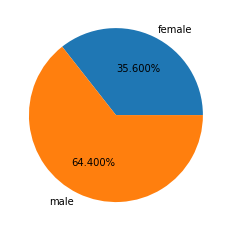

In [4]:
##2.4
#1
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url, skip_blank_lines=True)

s = titanic['sex']
count = s.groupby(s).count()
plt.pie(count, labels=count.index, autopct='%1.3f%%')
plt.show()

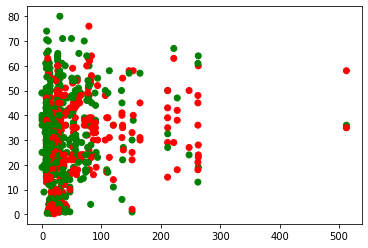

In [5]:
#2
colors = titanic.sex.map({'male':'green', 'female':'red', np.nan :'black'})
plt.scatter(titanic.fare, titanic.age, c=colors)

In [90]:
##2.5
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',\
                'Budapest_PaRis', 'Brussels_londOn'], 'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],\
                   'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]], 'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )',\
                '12. Air France', '"Swiss Air"']})

In [92]:
#1
for x,index in zip(df['FlightNumber'], df['FlightNumber'].index):
    if(pd.isna(x)):
        df['FlightNumber'][index]=int(df['FlightNumber'][index-1]+10)
df.FlightNumber = df.FlightNumber.astype(int)
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


In [98]:
#2
temp_df = df.copy()
new_cols = temp_df.From_To.str.partition('_')[[0,2]].rename({0:'From', 2:'To'}, axis=1)
new_cols

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


In [102]:
#3
new_cols.From = new_cols.From.str.capitalize()
new_cols.To = new_cols.To.str.capitalize()
new_cols

,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


In [103]:
#4
df = df.drop('From_To',1)
pd.concat([df, new_cols], axis=1)

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM(!),London,Paris
1,10055,[],<Air France> (12),Madrid,Milan
2,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,10075,[13],12. Air France,Budapest,Paris
4,10085,"[67, 32]","""Swiss Air""",Brussels,London


In [115]:
#5
delays = df['RecentDelays'].apply(pd.Series)
delays = delays.rename(columns = lambda x : 'delay_' + str(x+1))
df = df.drop('RecentDelays',1)
pd.concat([df, delays], axis=1)

,FlightNumber,Airline,delay_1,delay_2,delay_3
0,10045,KLM(!),23.0,47.0,NaN
1,10055,<Air France> (12),NaN,NaN,NaN
2,10065,(British Airways. ),24.0,43.0,87.0
3,10075,12. Air France,13.0,NaN,NaN
4,10085,"""Swiss Air""",67.0,32.0,NaN


In [40]:
##2.6
#1
import pandas as pd
from pandasql import sqldf
df = pd.read_csv('/Users/naresh/Downloads/adult.data', header=None, \
                 names=['age','workclass','fnlwgt','education','education_num','marital_status',\
                        'occupation','relationship','race','sex','capital_gain','capital_loss',\
                        'hours_per_week','native_country','unknown'], dtype={'sex':str, 'workclass':str})
df_obj = df.select_dtypes(['object'])
df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())
q = 'select * from df'
sqladb = lambda q: sqldf(q, globals())
sqladb('select * from df limit 10')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,unknown
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [42]:
#2
q = '''
SELECT avg(hours_per_week) FROM df where sex='Male' and workclass='Private'
'''
sqladb(q)

,avg(hours_per_week)
0,42.221226


In [45]:
#3
q1 = '''
  SELECT education, COUNT(education) AS Frequency

  FROM df

  GROUP BY education

  ORDER BY

  COUNT(education) DESC
'''
q2 = '''
  SELECT occupation, COUNT(occupation) AS Frequency

  FROM df

  GROUP BY occupation

  ORDER BY

  COUNT(occupation) DESC
'''
q3 = '''
  SELECT relationship, COUNT(relationship) AS Frequency

  FROM df

  GROUP BY relationship

  ORDER BY

  COUNT(relationship) DESC
'''
display(sqladb(q1))
display(sqladb(q2))
display(sqladb(q3))

,education,Frequency
0,HS-grad,10501
1,Some-college,7291
2,Bachelors,5355
3,Masters,1723
4,Assoc-voc,1382
5,11th,1175
6,Assoc-acdm,1067
7,10th,933
8,7th-8th,646
9,Prof-school,576


,occupation,Frequency
0,Prof-specialty,4140
1,Craft-repair,4099
2,Exec-managerial,4066
3,Adm-clerical,3770
4,Sales,3650
5,Other-service,3295
6,Machine-op-inspct,2002
7,?,1843
8,Transport-moving,1597
9,Handlers-cleaners,1370


,relationship,Frequency
0,Husband,13193
1,Not-in-family,8305
2,Own-child,5068
3,Unmarried,3446
4,Wife,1568
5,Other-relative,981


In [49]:
#4
q = '''
select count(*) as count from df where marital_status like 'Married%' and workclass='Private' and education='Masters'
'''
sqladb(q)

,count
0,540


In [54]:
#5
q = '''
select workclass,avg(age) as average, min(age) as minimum, max(age) as maximum from df group by workclass
'''
sqladb(q)

,workclass,average,minimum,maximum
0,?,40.960240,17,90
1,Federal-gov,42.590625,17,90
2,Local-gov,41.751075,17,90
3,Never-worked,20.571429,17,30
4,Private,36.797585,17,90
5,Self-emp-inc,46.017025,17,84
6,Self-emp-not-inc,44.969697,17,90
7,State-gov,39.436055,17,81
8,Without-pay,47.785714,19,72


In [57]:
#6
q='''
select native_country,avg(age) from df group by native_country
'''
sqladb(q)

,native_country,avg(age)
0,?,38.725557
1,Cambodia,37.789474
2,Canada,42.545455
3,China,42.533333
4,Columbia,39.711864
5,Cuba,45.768421
6,Dominican-Republic,37.728571
7,Ecuador,36.642857
8,El-Salvador,34.132075
9,England,41.155556


In [61]:
#7
q='''
select capital_gain-capital_loss as Net_Capital_Gain from df
'''
sqladb(q).head(10)

,Net_Capital_Gain
0,2174
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,14084
9,5178


In [3]:
##Problem statement-2
#1
import pandas as pd
from pandasql import sqldf
df = pd.read_csv('/Users/naresh/Downloads/adult.data', header=None, \
                 names=['age','workclass','fnlwgt','education','education_num','marital_status',\
                        'occupation','relationship','race','sex','capital_gain','capital_loss',\
                        'hours_per_week','native_country','unknown'], dtype={'sex':str, 'workclass':str})
df_obj = df.select_dtypes(['object'])
df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())
from sqlalchemy import create_engine

disk_engine = create_engine('sqlite:///adult_data.db')
df.to_sql('adult_data', disk_engine, if_exists='replace')

In [4]:
#2
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String
Base = declarative_base()

class Adult(Base):
    __tablename__ = 'adult_data'

    age = Column(Integer)
    fnlwgt = Column(Integer, primary_key=True)
    education = Column(String)
    sex = Column(String)

    def __repr__(self):
        return "<Adult(age={0}, final_weight={1}, education={2}, sex={3})>)".format(self.age, self.fnlwgt, self.education, self.sex)
    
from sqlalchemy.orm import sessionmaker
SessionMaker = sessionmaker()
SessionMaker.configure(bind=disk_engine)
session = SessionMaker()

adult1 = session.query(Adult).filter(Adult.fnlwgt==77516).one()
adult2 = session.query(Adult).filter(Adult.fnlwgt==122272).one()
display(adult1)
display(adult2)
adult1.sex='Female'
session.commit()
display(session.query(Adult).filter(Adult.fnlwgt==77516).one())
display(session.query(Adult).filter(Adult.fnlwgt==122272).one())

<Adult(age=39, final_weight=77516, education=Bachelors, sex=Male)>)

<Adult(age=23, final_weight=122272, education=Bachelors, sex=Female)>)

<Adult(age=39, final_weight=77516, education=Bachelors, sex=Female)>)

<Adult(age=23, final_weight=122272, education=Bachelors, sex=Female)>)

In [22]:
#3
adult1 = session.query(Adult).filter(Adult.fnlwgt==77516).one()
adult2 = session.query(Adult).filter(Adult.fnlwgt==122272).one()
display(adult1)
display(adult2)
session.delete(adult1)
session.delete(adult2)
session.commit()
adult1 = session.query(Adult).filter(Adult.fnlwgt==77516).count()
adult2 = session.query(Adult).filter(Adult.fnlwgt==122272).count()
display(adult1)
display(adult2)

<Adult(age=39, final_weight=77516, education=Bachelors, sex=Female)>)

<Adult(age=23, final_weight=122272, education=Bachelors, sex=Female)>)

0

0

In [30]:
#4
display(session.query(Adult).filter(Adult.education=='Bachelors').all()[:2])
display(session.query(Adult).filter(Adult.sex=='Bachelors').all()[:2])

[<Adult(age=50, final_weight=83311, education=Bachelors, sex=Male)>),
 <Adult(age=28, final_weight=338409, education=Bachelors, sex=Female)>)]

[<Adult(age=28, final_weight=338409, education=Bachelors, sex=Female)>),
 <Adult(age=37, final_weight=284582, education=Masters, sex=Female)>)]

In [9]:
#5
from sqlalchemy import func
display(session.query(func.count('*')).select_from(Adult).scalar())
display(session.query(func.avg(Adult.age)).select_from(Adult).scalar())

32561

38.58164675532078